In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:

X_train.shape

(60000, 28, 28)

In [6]:

X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

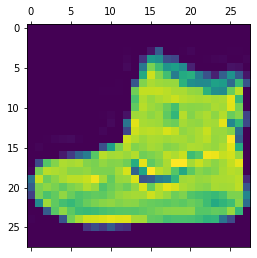

In [9]:
plt.matshow(X_train[0])

# Normalize training data before training the neural net

In [10]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [18]:

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation



In [19]:
model = Sequential()


In [20]:
model.add(Flatten(input_shape=[28, 28]))


In [28]:
model.add(Dense(100, activation="relu"))


In [29]:
model.add(Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 102,820
Trainable params: 102,820
Non-trainable params: 0
________________________________________________

In [31]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3208 - accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8853
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3058 - accuracy: 0.8873
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2863 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.8958
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2750 - accuracy: 0.8976
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8983
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.266

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8679


[0.37504830956459045, 0.867900013923645]

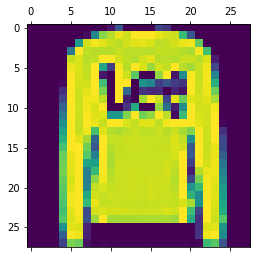

In [41]:

plt.matshow(X_test[1])

In [39]:
yp = model.predict(X_test)

In [42]:
np.argmax(yp[1])

2

In [43]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [44]:

class_labels[np.argmax(yp[0])]

'Ankle boot'